In [1]:
#importation of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
import warnings
warnings.filterwarnings('ignore')

# EDA (Eplanatory Data Analysis)

In [2]:
#function to analyse the dataset
def info(df):
    print('info')
    print(df.info())
    print('------------')
    print('describe')
    print(df.describe())
    print('------------')
    print('nunique')
    print(df.nunique())
    print('------------')
    print('sum of nan')
    print(df.isnull().sum())

#function to print all unique value to have a look
def uninfo(df):
    for i in df:
        uni =df[i].unique()
        print(i)
        print(uni)
        print('-----------------')

In [3]:
#reading the file
file = pd.read_csv("data/data.csv", delimiter=",")

In [4]:
#from the project, the target is the median_house_value
file

Unnamed: 0  longitude  latitude  housing_median_age  total_rooms  \
0            2072    -119.84     36.77                 6.0       1853.0   
1           10600    -117.80     33.68                 8.0       2032.0   
2            2494    -120.19     36.60                25.0        875.0   
3            4284    -118.32     34.10                31.0        622.0   
4           16541    -121.23     37.79                21.0       1922.0   
...           ...        ...       ...                 ...          ...   
16507        1099    -121.90     39.59                20.0       1465.0   
16508       18898    -122.25     38.11                49.0       2365.0   
16509       11798    -121.22     38.92                19.0       2531.0   
16510        6637    -118.14     34.16                39.0       2776.0   
16511        2575    -124.13     40.80                31.0       2152.0   

       total_bedrooms  population  households  median_income  \
0               473.0      1397.0       417.0         1.4817   
1               349.0       862.0       340.0         6.9133   
2               214.0       931.0       214.0         1.5536   
3               229.0       597.0       227.0         1.5284   
4               373.0      1130.0       372.0         4.0815   
...               ...         ...         ...            ...   
16507           278.0       745.0       250.0         3.0625   
16508           504.0      1131.0       458.0         2.6133   
16509           461.0      1206.0       429.0         4.4958   
16510           840.0      2546.0       773.0         2.5750   
16511           462.0      1259.0       420.0         2.2478   

       median_house_value ocean_proximity  
0                 72000.0          INLAND  
1                274100.0       <1H OCEAN  
2                 58300.0          INLAND  
3                200000.0       <1H OCEAN  
4                117900.0          INLAND  
...                   ...             ...  
16507             93800.0          INLAND  
16508            103100.0        NEAR BAY  
16509            192600.0          INLAND  
16510            153500.0       <1H OCEAN  
16511             81100.0      NEAR OCEAN  

[16512 rows x 11 columns]

In [5]:
#first overall look
# we can see that all the Nans are in the total_bedrooms column
#there is 1 categorial column (ocea_proximity) containing 5 object values
#unnamed: 0 is composed of int values, it looks like an PRIMARY KEY
print('----------------')
info(file)
print('----------------')
uninfo(file)

----------------
info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16512 non-null  int64  
 1   longitude           16512 non-null  float64
 2   latitude            16512 non-null  float64
 3   housing_median_age  16512 non-null  float64
 4   total_rooms         16512 non-null  float64
 5   total_bedrooms      16336 non-null  float64
 6   population          16512 non-null  float64
 7   households          16512 non-null  float64
 8   median_income       16512 non-null  float64
 9   median_house_value  16512 non-null  float64
 10  ocean_proximity     16512 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.4+ MB
None
------------
describe
         Unnamed: 0     longitude      latitude  housing_median_age  \
count  16512.000000  16512.000000  16512.000000        16512.000000   
m

In [6]:
#calculate the % of missing values in the dataset
def percent_nan(data):   
    nan_sum = data.isnull().sum()
    total_cells = np.product(file.shape)
    total_missing = nan_sum.sum()
    percent_missing = (total_missing/total_cells) * 100
    print(percent_missing)

In [7]:
percent_nan(file)

0.09689922480620156


<AxesSubplot:>

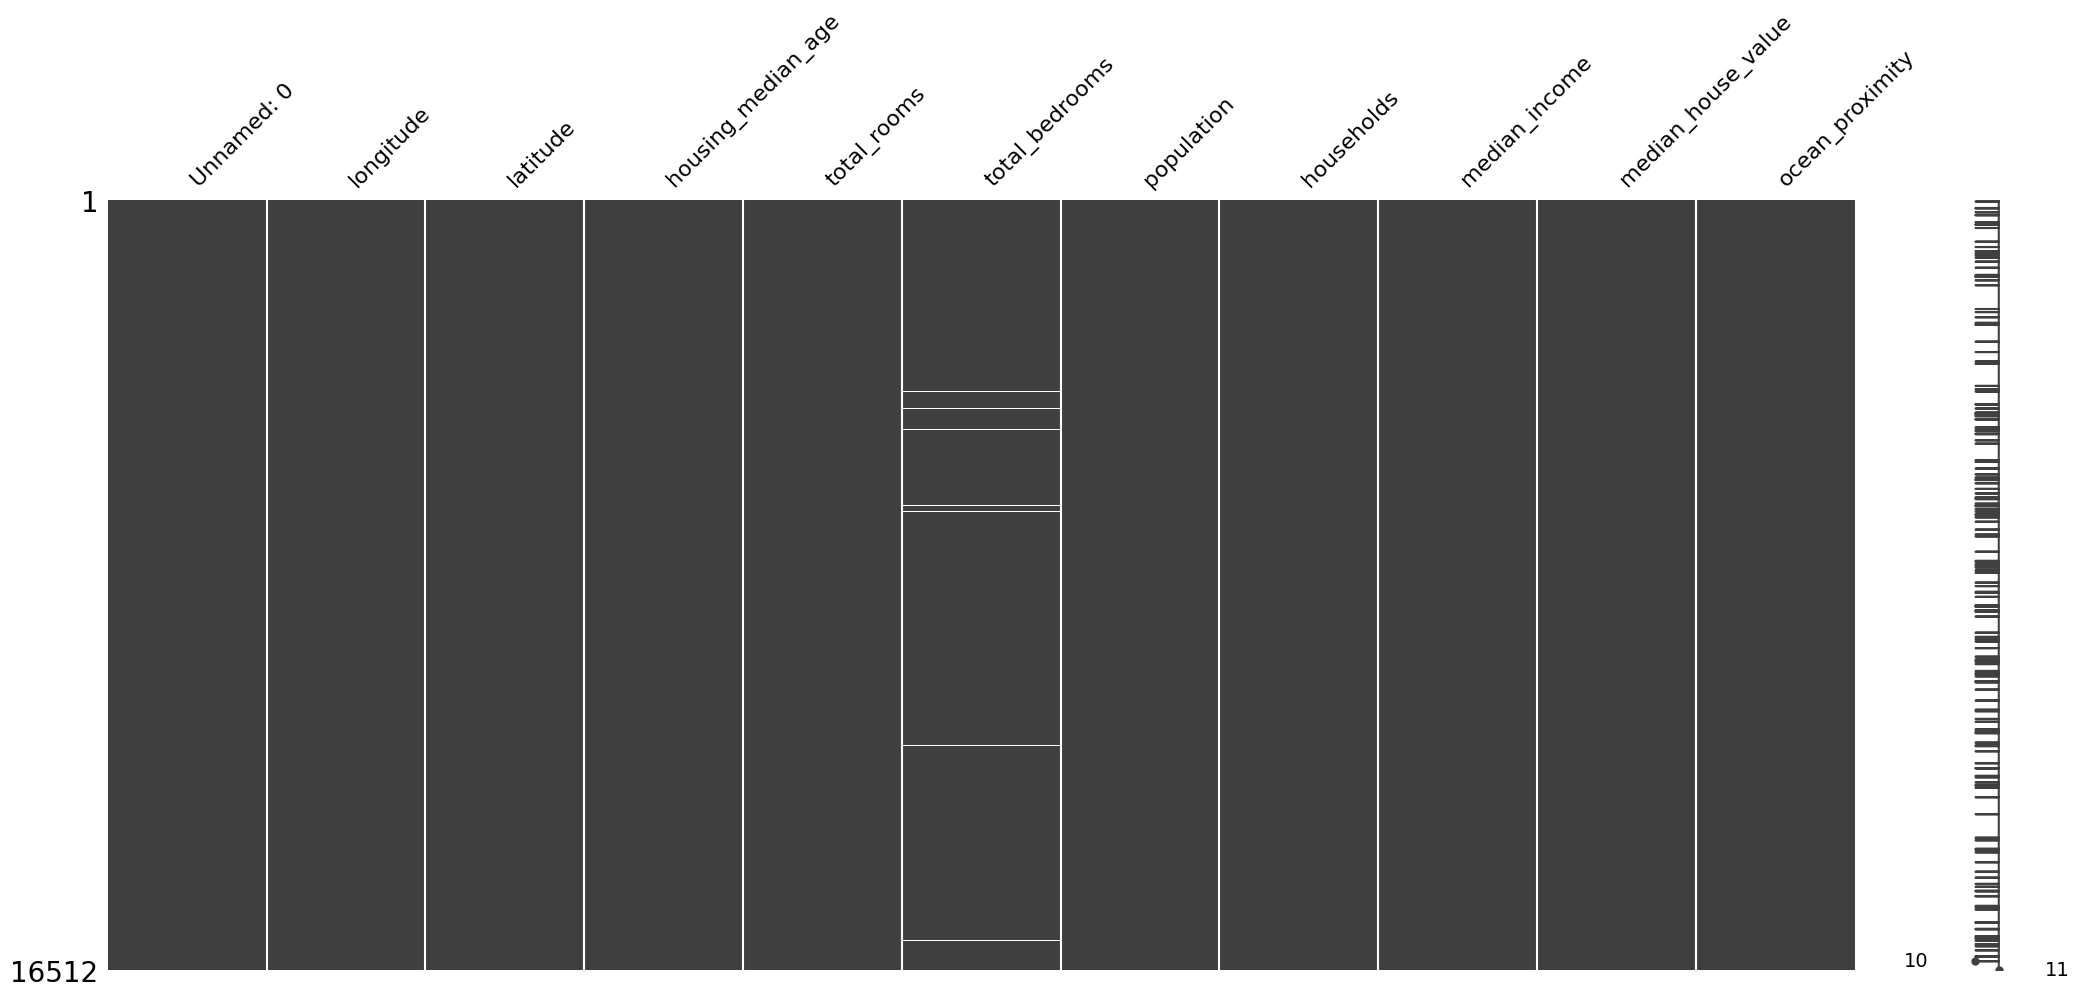

In [8]:
#using missingno to have a more visual look
mno.matrix(file)

In [9]:
#creating a df of nan to see if there is a pattern in the data (doesn't looks like it)
file_nan = file[file.isna().any(axis=1)]
file_nan

Unnamed: 0  longitude  latitude  housing_median_age  total_rooms  \
33           5723    -118.23     34.18                45.0       2332.0   
171          2578    -124.06     40.86                34.0       4183.0   
178         10033    -121.08     39.22                30.0       2188.0   
179         19485    -120.98     37.66                10.0        934.0   
259         19766    -122.10     40.03                25.0       2516.0   
...           ...        ...       ...                 ...          ...   
16002       17202    -119.73     34.44                38.0       1729.0   
16089       17041    -122.28     37.51                33.0       4719.0   
16214        4591    -118.28     34.06                42.0       2472.0   
16228        9942    -122.23     38.17                45.0        350.0   
16323        2301    -119.78     36.82                25.0       5016.0   

       total_bedrooms  population  households  median_income  \
33                NaN       943.0       339.0         8.1132   
171               NaN      1891.0       669.0         3.2216   
178               NaN      1033.0       437.0         2.1419   
179               NaN       401.0       255.0         0.9336   
259               NaN      1266.0       494.0         1.7566   
...               ...         ...         ...            ...   
16002             NaN       801.0       395.0         3.1364   
16089             NaN      1980.0       757.0         6.1064   
16214             NaN      3795.0      1179.0         1.2254   
16228             NaN       225.0        72.0         1.8942   
16323             NaN      2133.0       928.0         3.6250   

       median_house_value ocean_proximity  
33               446600.0       <1H OCEAN  
171               98100.0      NEAR OCEAN  
178              105200.0          INLAND  
179              127100.0          INLAND  
259               58400.0          INLAND  
...                   ...             ...  
16002            357500.0      NEAR OCEAN  
16089            405000.0      NEAR OCEAN  
16214            162500.0       <1H OCEAN  
16228            216700.0        NEAR BAY  
16323             89500.0          INLAND  

[176 rows x 11 columns]

In [10]:
#checking duplicates
file.duplicated().sum()

0

In [11]:
#looking at the Unnamed column, it looks like it's the id for the blocs
test = file['Unnamed: 0']
truc = test.to_frame()
truc.sort_values(by=('Unnamed: 0'))

Unnamed: 0
4569            0
276             2
7490            3
705             5
9496            6
...           ...
734         20635
14840       20636
9901        20637
12100       20638
10660       20639

[16512 rows x 1 columns]

In [12]:
#renaming for better manipulation
raw = file.rename(columns={"Unnamed: 0": "bloc_id"})

In [13]:
#i am ensure to drop the Nan so i will replace it 
#with the thought that the total_bedrooms with Nan are offices or function building
raw = raw.fillna(0)

In [14]:
#first raw dataframe that i will work on
raw

bloc_id  longitude  latitude  housing_median_age  total_rooms  \
0         2072    -119.84     36.77                 6.0       1853.0   
1        10600    -117.80     33.68                 8.0       2032.0   
2         2494    -120.19     36.60                25.0        875.0   
3         4284    -118.32     34.10                31.0        622.0   
4        16541    -121.23     37.79                21.0       1922.0   
...        ...        ...       ...                 ...          ...   
16507     1099    -121.90     39.59                20.0       1465.0   
16508    18898    -122.25     38.11                49.0       2365.0   
16509    11798    -121.22     38.92                19.0       2531.0   
16510     6637    -118.14     34.16                39.0       2776.0   
16511     2575    -124.13     40.80                31.0       2152.0   

       total_bedrooms  population  households  median_income  \
0               473.0      1397.0       417.0         1.4817   
1               349.0       862.0       340.0         6.9133   
2               214.0       931.0       214.0         1.5536   
3               229.0       597.0       227.0         1.5284   
4               373.0      1130.0       372.0         4.0815   
...               ...         ...         ...            ...   
16507           278.0       745.0       250.0         3.0625   
16508           504.0      1131.0       458.0         2.6133   
16509           461.0      1206.0       429.0         4.4958   
16510           840.0      2546.0       773.0         2.5750   
16511           462.0      1259.0       420.0         2.2478   

       median_house_value ocean_proximity  
0                 72000.0          INLAND  
1                274100.0       <1H OCEAN  
2                 58300.0          INLAND  
3                200000.0       <1H OCEAN  
4                117900.0          INLAND  
...                   ...             ...  
16507             93800.0          INLAND  
16508            103100.0        NEAR BAY  
16509            192600.0          INLAND  
16510            153500.0       <1H OCEAN  
16511             81100.0      NEAR OCEAN  

[16512 rows x 11 columns]

In [15]:
#making a df without categorial feature
raw_nocean = raw.drop('ocean_proximity',axis=1)

### univariate analysis 

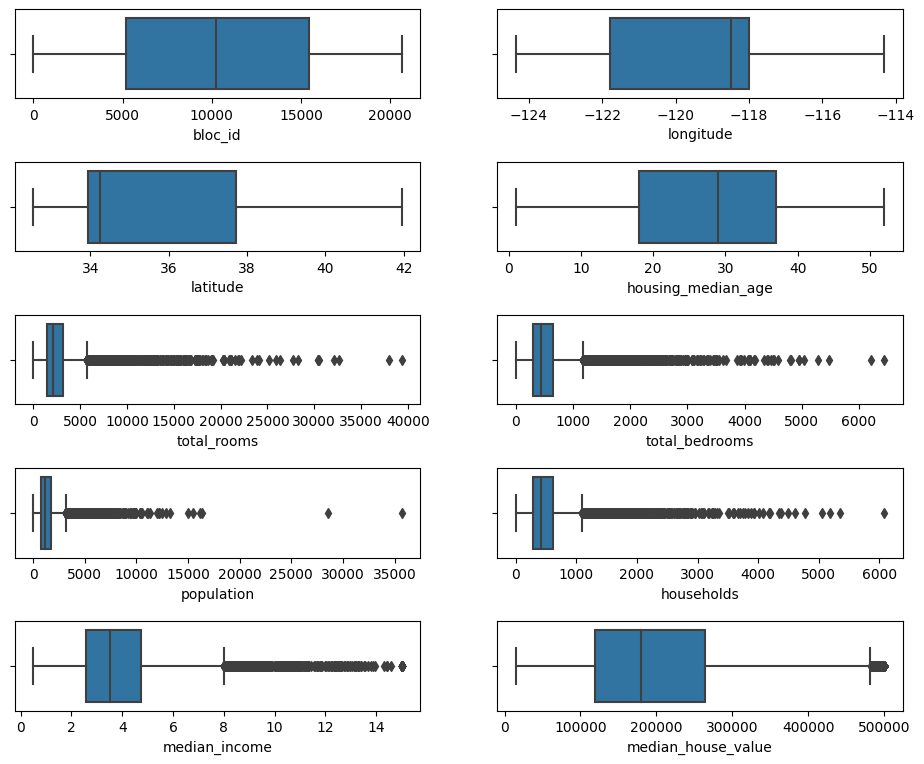

In [16]:
#individual boxplot
fig, axs = plt.subplots(5, 2, figsize=(10,8))
axs = axs.flatten()
fig.tight_layout(pad=2.5)
for i, col in enumerate(raw_nocean.columns):
    sns.boxplot(raw_nocean[col], ax=axs[i])

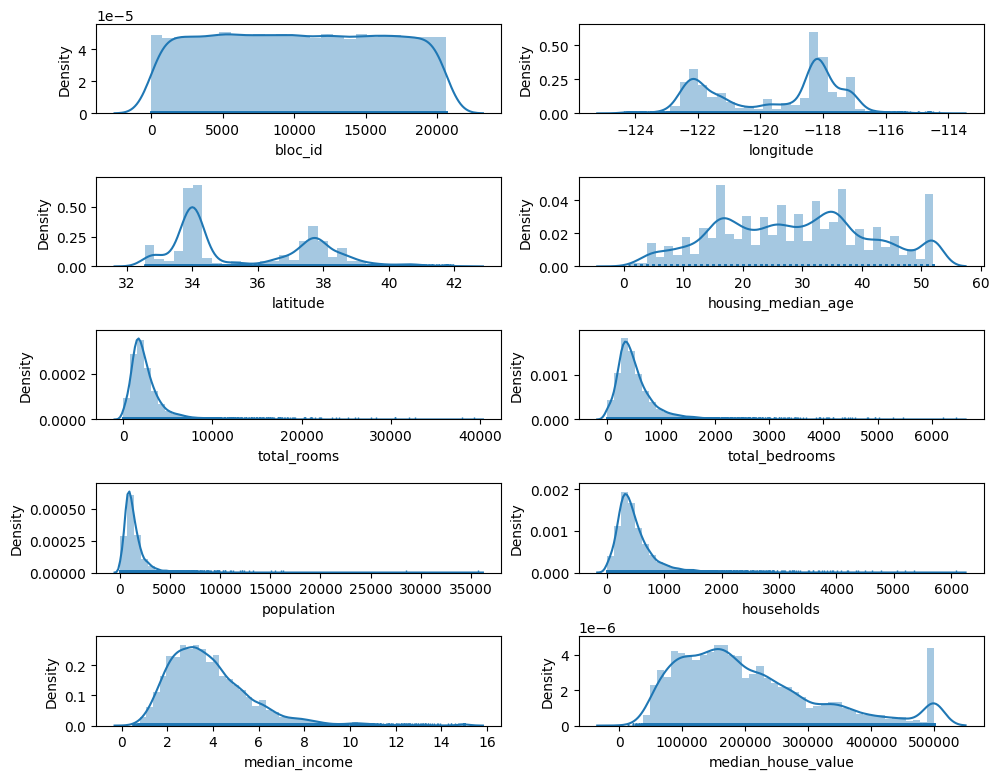

In [17]:
#individual distplot
fig, axs = plt.subplots(5, 2, figsize=(10,8))
axs = axs.flatten()
fig.tight_layout(pad=2.5)
for i, col in enumerate(raw_nocean.columns):
    sns.distplot(raw_nocean[col],rug=True, ax=axs[i])

<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

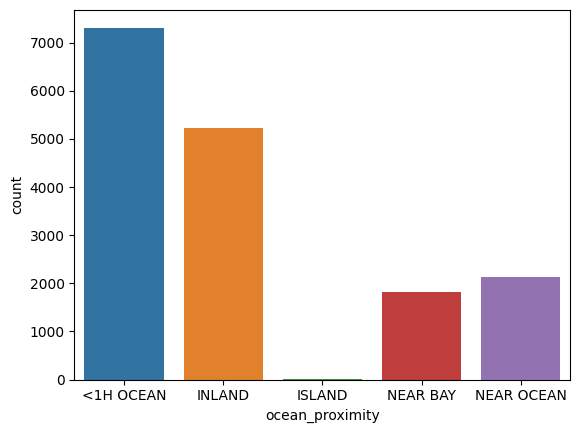

In [18]:
#countplot for the ocean proximity
sns.countplot(x=raw["ocean_proximity"].sort_values())

<AxesSubplot:xlabel='ocean_proximity'>

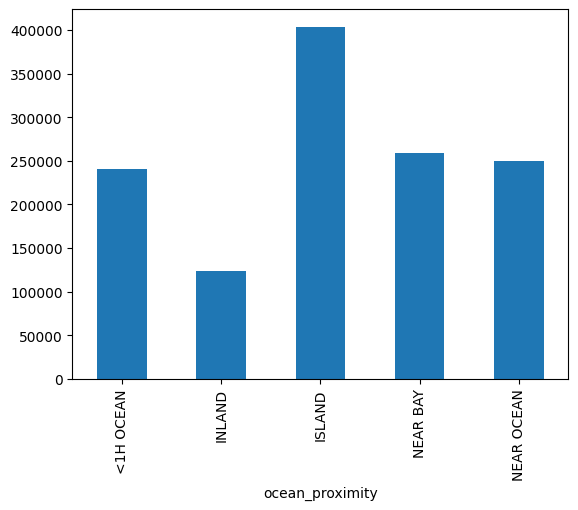

In [19]:
#comparing the mean of median_house_value of each categories
#there is not many island proximity compared to how much they cost
raw.groupby('ocean_proximity')['median_house_value'].mean().plot.bar()

In [20]:
#i will rerun all the steps before without the outliers
raw1 = raw

In [21]:
#finding the upper fence value of the boxplots with a function
def outliers_finder(data,columns):
    lower = []
    upper = []
    nl = '\n'
    for i in columns:
        Q1 = data[i].quantile(0.25)
        Q3 = data[i].quantile(0.75)
        IQR = Q3 - Q1
        Lower_Fence = Q1 - (1.5 * IQR)
        Upper_Fence = Q3 + (1.5 * IQR)
        lower.append(Lower_Fence)
        upper.append(Upper_Fence)
    return print(f"lower fence {lower}{nl}upper fence {upper}")

In [22]:
#list of outliers threshold
outliers_finder(raw,['total_rooms','total_bedrooms','population','households','median_income','median_house_value'])

lower fence [-1116.0, -236.0, -637.0, -209.0, -0.6935875, -98250.0]
upper fence [5716.0, 1172.0, 3163.0, 1095.0, 7.9893125000000005, 482150.0]


In [23]:
#defining the columns i will change with the threshold
out_col = ['total_rooms','total_bedrooms','population','households','median_income','median_house_value']
upper = [5716.0, 1173.5, 3163.0, 1095.0, 7.9893125000000005, 482150.0]

In [24]:
#zipping out the outliers
for i,u in zip(out_col,upper):
    raw1 = raw1[raw1[i] <= u]

In [25]:
#i lost 2417 rows from this operation
raw1.shape

(14095, 11)

In [26]:
#removing ocean_proximity for quantity plotting
raw1_nocean = raw1.drop('ocean_proximity',axis=1)

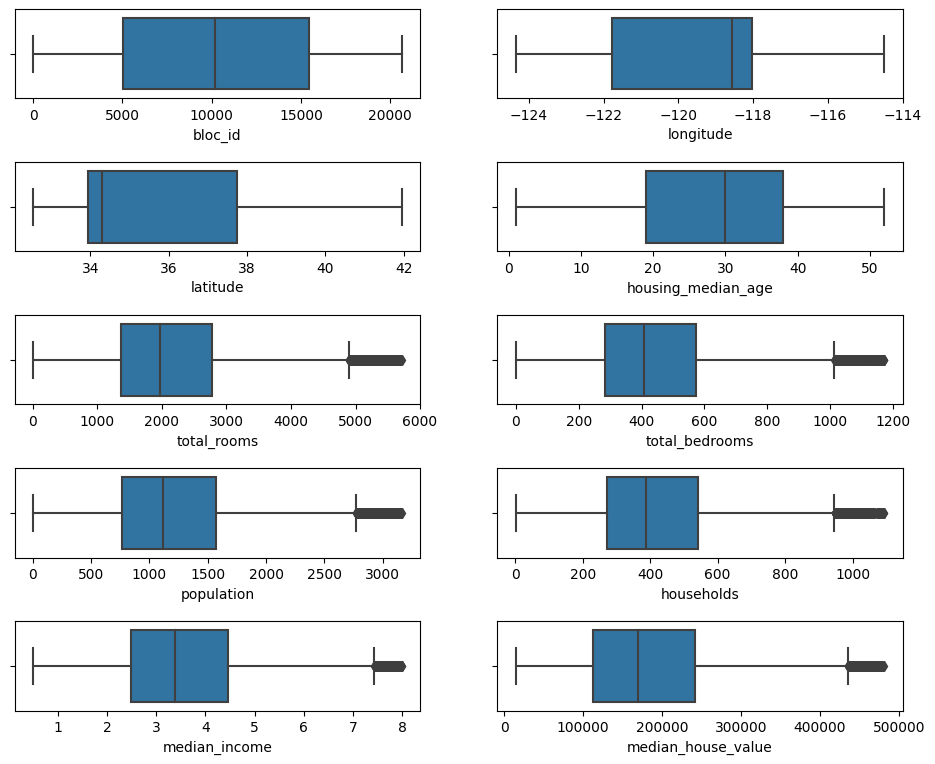

In [27]:
#univariate analisys of the new df
fig, axs = plt.subplots(5, 2, figsize=(10,8))
axs = axs.flatten()
fig.tight_layout(pad=2.5)
for i, col in enumerate(raw1_nocean.columns):
    sns.boxplot(raw1_nocean[col], ax=axs[i])

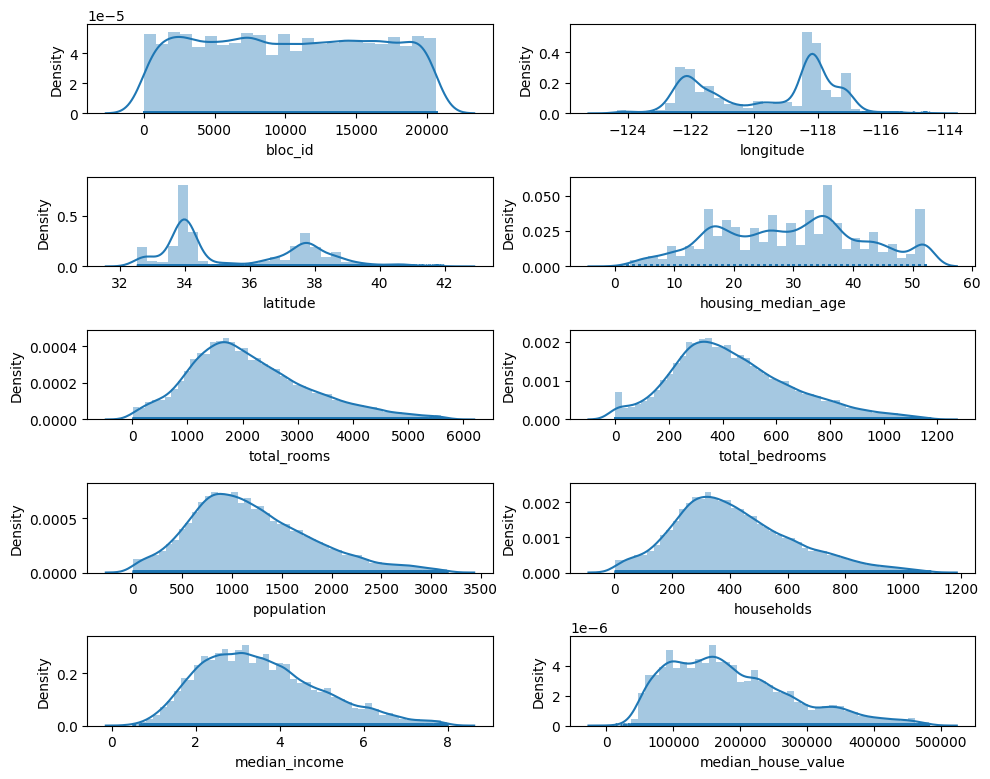

In [28]:
fig, axs = plt.subplots(5, 2, figsize=(10,8))
axs = axs.flatten()
fig.tight_layout(pad=2.5)
for i, col in enumerate(raw1_nocean.columns):
    sns.distplot(raw1_nocean[col],rug=True, ax=axs[i])

In [29]:
#i will also remove island from ocean_proximity since it is scarce (only 4 but high cost)
raw1 = raw1[raw1['ocean_proximity'] != 'ISLAND']

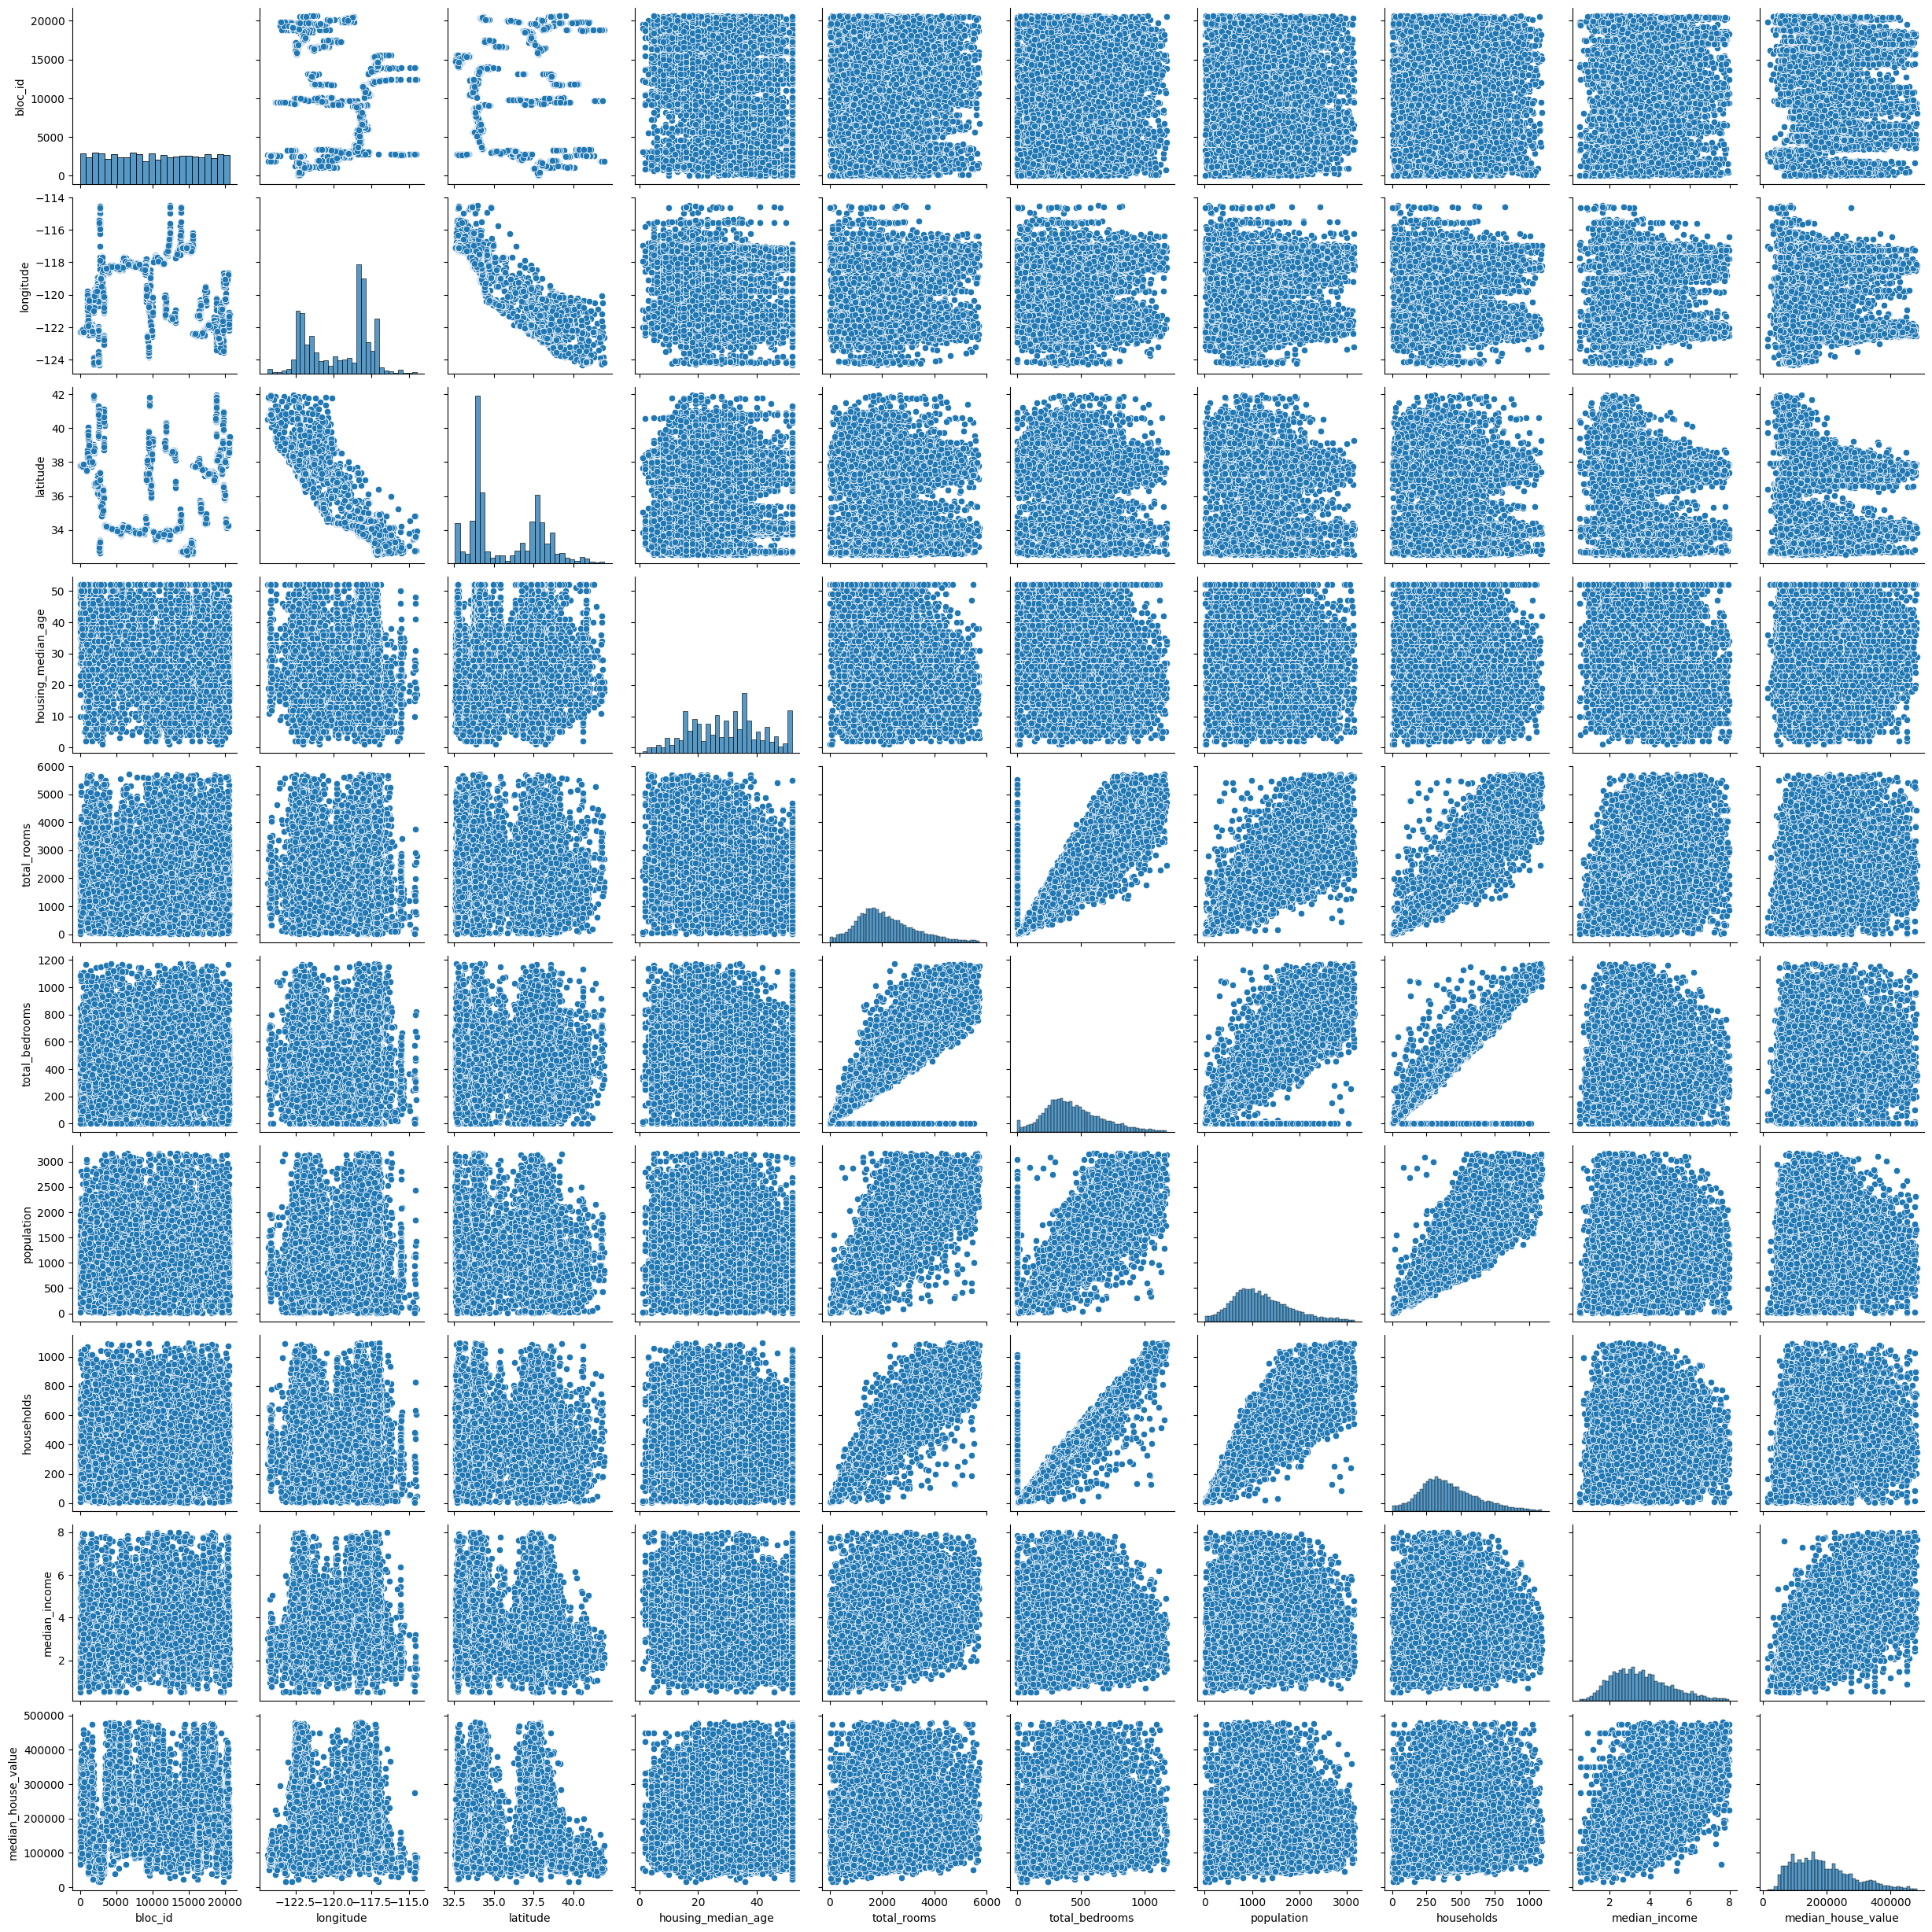

In [31]:
#quick bivariate analysis to see patterns of correlation
#not much information except that we can see california with the latitude and longitude
#there is a high negative correlation with longitude and ltatitude (since it's GPS data)
#housing_median_age affects nearly everything negatively (maybe because the older the housing, the less atractive it is)
#with the target, we can see clearly that it's not really correlated with anything except a little by median_income
#median_house_value (the target) has some correlation with median_income (since the more you earn, the more you spend maybe)
sns.pairplot(data=raw1)

In [32]:
#last check
percent_nan(raw1)

0.0


In [33]:
raw1.duplicated().sum()

0

In [34]:
# first final df
EDA = raw1

In [35]:
EDA

bloc_id  longitude  latitude  housing_median_age  total_rooms  \
0         2072    -119.84     36.77                 6.0       1853.0   
1        10600    -117.80     33.68                 8.0       2032.0   
2         2494    -120.19     36.60                25.0        875.0   
3         4284    -118.32     34.10                31.0        622.0   
4        16541    -121.23     37.79                21.0       1922.0   
...        ...        ...       ...                 ...          ...   
16507     1099    -121.90     39.59                20.0       1465.0   
16508    18898    -122.25     38.11                49.0       2365.0   
16509    11798    -121.22     38.92                19.0       2531.0   
16510     6637    -118.14     34.16                39.0       2776.0   
16511     2575    -124.13     40.80                31.0       2152.0   

       total_bedrooms  population  households  median_income  \
0               473.0      1397.0       417.0         1.4817   
1               349.0       862.0       340.0         6.9133   
2               214.0       931.0       214.0         1.5536   
3               229.0       597.0       227.0         1.5284   
4               373.0      1130.0       372.0         4.0815   
...               ...         ...         ...            ...   
16507           278.0       745.0       250.0         3.0625   
16508           504.0      1131.0       458.0         2.6133   
16509           461.0      1206.0       429.0         4.4958   
16510           840.0      2546.0       773.0         2.5750   
16511           462.0      1259.0       420.0         2.2478   

       median_house_value ocean_proximity  
0                 72000.0          INLAND  
1                274100.0       <1H OCEAN  
2                 58300.0          INLAND  
3                200000.0       <1H OCEAN  
4                117900.0          INLAND  
...                   ...             ...  
16507             93800.0          INLAND  
16508            103100.0        NEAR BAY  
16509            192600.0          INLAND  
16510            153500.0       <1H OCEAN  
16511             81100.0      NEAR OCEAN  

[14091 rows x 11 columns]

In [36]:
export = EDA.to_csv('data/EDA.csv')

In [37]:
#export